## Python Basic

In [1]:
book = 35
exchange = 30
book * exchange

1050

In [2]:
exchange = 29
book * exchange

1015

## Python Demo

In [4]:
import requests
res = requests.get('https://www.coingecko.com/en/price_charts/bitcoin/usd')
#res.text

In [15]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')
price = soup.select('.coin_portfolio_price_chart')[0].prettify().split('=')[2].replace(' data-vs-currency', '')

In [22]:
import pandas
df = pandas.DataFrame(eval(eval(price)))
df.columns = ['time', 'price']
df.index = df['time']
df.head()

,time,price
time,,
1.509073e+12,1.509073e+12,5917.52
1.509073e+12,1.509073e+12,5917.39
1.509074e+12,1.509074e+12,5895.78
1.509074e+12,1.509074e+12,5871.14
1.509075e+12,1.509075e+12,5880.00


Populating the interactive namespace from numpy and matplotlib


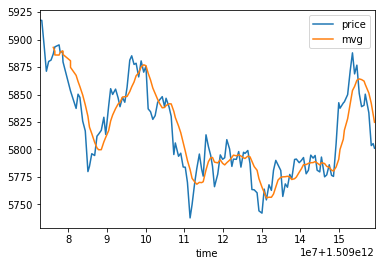

In [24]:
%pylab inline
df['mvg'] = df['price'].rolling(window = 7).mean()
df[['price', 'mvg']].plot(kind = 'line')